In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\subhadip sinha\OneDrive\CODING\PYTHON\TENSORFLOW\csv\ushape.csv")

In [4]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [5]:
df.columns=["X","Y","class"]
df

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


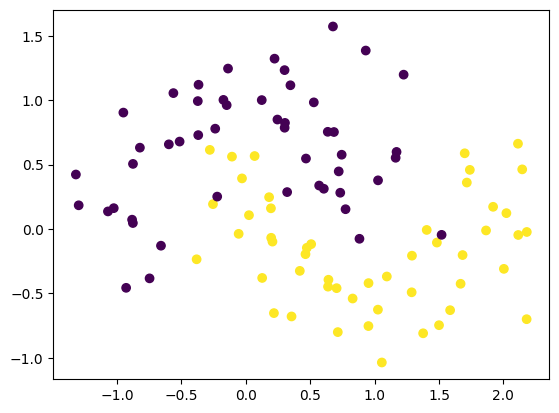

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

d:\PYTHON_environment\ENV2\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Set parameters to 0 
# this are defoult weight
model.get_weights()

[array([[ 0.3989691 , -0.5610553 ,  0.05059814, -0.60651606,  0.55071837,
          0.5853016 ,  0.01017475,  0.616455  ,  0.4147218 ,  0.19417644],
        [-0.42398584, -0.6163021 , -0.25534785,  0.03935355,  0.5030605 ,
         -0.54236805,  0.50469   ,  0.4372216 , -0.3281068 , -0.25222763]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.6675913 ],
        [ 0.1260677 ],
        [-0.5568749 ],
        [-0.11730915],
        [ 0.36489016],
        [ 0.28161675],
        [-0.55743706],
        [ 0.13401544],
        [-0.351219  ],
        [-0.59319913]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
initial_weights = model.get_weights()

In [12]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.4944 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5266 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4797 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4836 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4797 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [17]:
model.get_weights()

[array([[ 0.44197983,  0.44197983,  0.44197983,  0.44197983,  0.44197983,
          0.44197983,  0.44197983,  0.44197983,  0.44197983,  0.44197983],
        [-0.48257735, -0.48257735, -0.48257735, -0.48257735, -0.48257735,
         -0.48257735, -0.48257735, -0.48257735, -0.48257735, -0.48257735]],
       dtype=float32),
 array([-0.13595644, -0.13595644, -0.13595644, -0.13595644, -0.13595644,
        -0.13595644, -0.13595644, -0.13595644, -0.13595645, -0.13595645],
       dtype=float32),
 array([[0.06416356],
        [0.06416356],
        [0.06416356],
        [0.06416356],
        [0.06416356],
        [0.06416356],
        [0.06416356],
        [0.06416356],
        [0.06416356],
        [0.06416356]], dtype=float32),
 array([-0.06134635], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

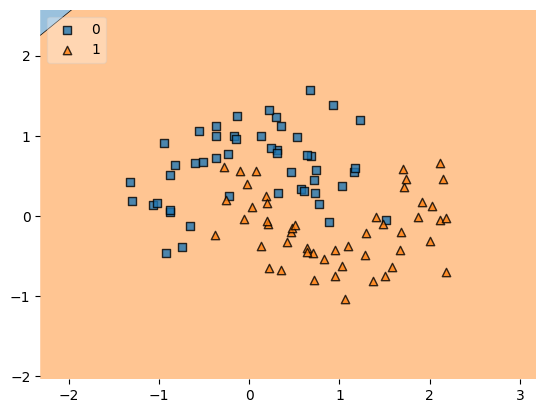

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)